In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xls = pd.ExcelFile(r'C:\Users\win\Desktop\Data Assignment.xlsx')
ABC = pd.read_excel(xls, 'Associate ABC')
XYZ = pd.read_excel(xls, 'Associate XYZ')
KLM = pd.read_excel(xls, 'Associlate KLM')

In [3]:
ABC.columns,XYZ.columns,KLM.columns

(Index(['Date', 'No of Leads', 'Time Spent on LG (in mins)'], dtype='object'),
 Index(['Date', 'No of Leads', 'Time Spent on LG (in mins)'], dtype='object'),
 Index(['Date', 'No of Leads', 'Time Spent on LG'], dtype='object'))

In [4]:
KLM.rename(columns={"Time Spent on LG":"Time Spent on LG (in mins)"},inplace=True)

In [5]:
ABC['Name']='ABC'
XYZ['Name']='XYZ'
KLM['Name']='KLM'

In [6]:
names=['ABC','XYZ','KLM']

In [7]:
data=pd.concat([ABC,XYZ,KLM],axis=0)

In [8]:
data

,Date,No of Leads,Time Spent on LG (in mins),Name
0,2023-01-09,2.0,300.0,ABC
1,2023-01-10,1.0,300.0,ABC
2,2023-01-11,5.0,300.0,ABC
3,2023-01-12,4.0,300.0,ABC
4,2023-01-13,5.0,300.0,ABC
...,...,...,...,...
119,2023-05-08,10.0,420.0,KLM
120,2023-05-09,9.0,540.0,KLM
121,2023-05-10,8.0,360.0,KLM
122,2023-05-11,12.0,420.0,KLM


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 123
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        267 non-null    datetime64[ns]
 1   No of Leads                 199 non-null    float64       
 2   Time Spent on LG (in mins)  206 non-null    float64       
 3   Name                        267 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 10.4+ KB


In [10]:
data.isna().sum()

Date                           0
No of Leads                   68
Time Spent on LG (in mins)    61
Name                           0
dtype: int64

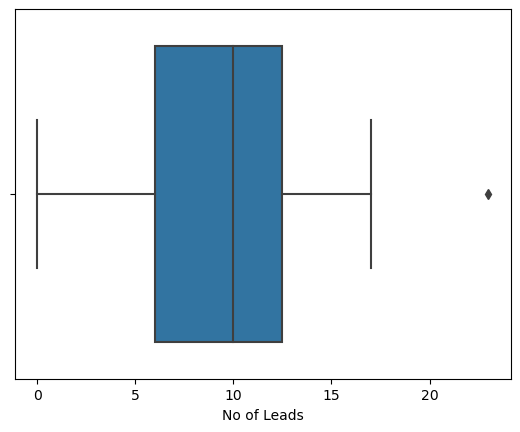

In [11]:
sns.boxplot(x=data['No of Leads'])
plt.show()

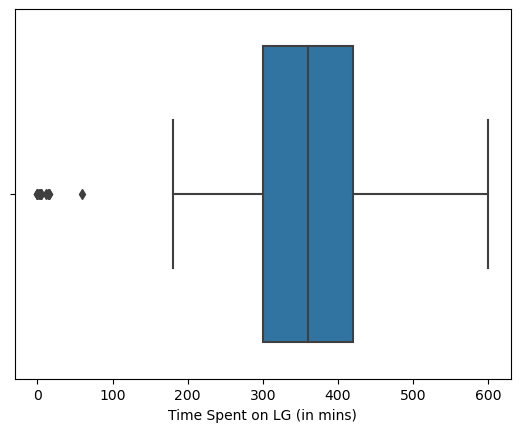

In [12]:
sns.boxplot(x=data['Time Spent on LG (in mins)'])
plt.show()

In [13]:
data=data.reset_index()

In [14]:
print("Average Leads Generated per day")
for name in names:
    print(f"{name}: {np.round(np.mean(data[data['Name']==name]['No of Leads']),2)}")

Average Leads Generated per day
ABC: 6.54
XYZ: 10.85
KLM: 9.74


In [15]:
print("Average Time Spent per day")
for name in names:
    print(f"{name}: {np.round(np.mean(data[data['Name']==name]['Time Spent on LG (in mins)']),2)} min")

Average Time Spent per day
ABC: 288.31 min
XYZ: 387.07 min
KLM: 384.77 min


In [16]:
print("Conversion Rate")
for name in names:
    print(f"{name}: {np.round(np.sum(data[data['Name']==name]['No of Leads'])/(np.sum(data[data['Name']==name]['Time Spent on LG (in mins)'])/60),2)}")

Conversion Rate
ABC: 1.13
XYZ: 1.68
KLM: 1.56


In [17]:
print(f"Total leads generated from ")
for name in names:
    print(f"{data[data['Name']==name]['Date'].min()} - {data[data['Name']==name]['Date'].max()} {name}: {np.sum(data[data['Name']==name]['No of Leads'])}")

Total leads generated from 
2023-01-09 00:00:00 - 2023-03-10 00:00:00 ABC: 314.0
2023-01-09 00:00:00 - 2023-03-10 00:00:00 XYZ: 445.0
2023-01-09 00:00:00 - 2023-05-12 00:00:00 KLM: 1071.0


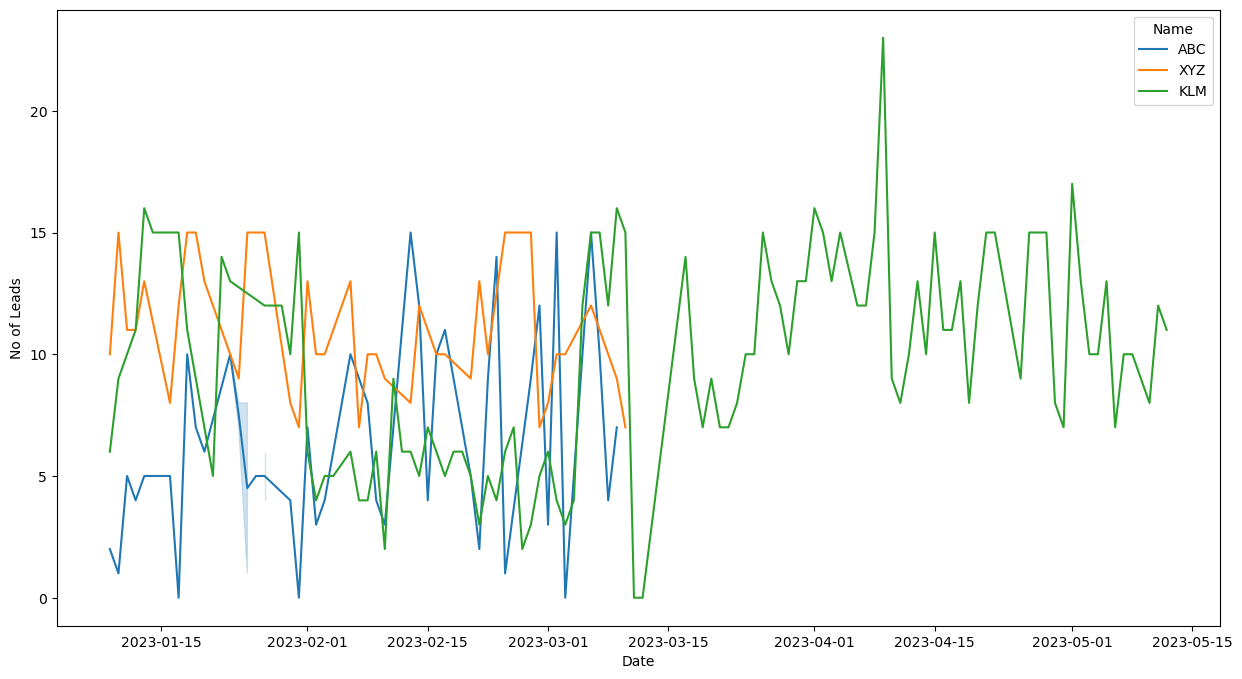

In [18]:
fig=plt.figure(figsize=(15,8))
sns.lineplot(data=data,x='Date',y='No of Leads',hue='Name')
plt.show()

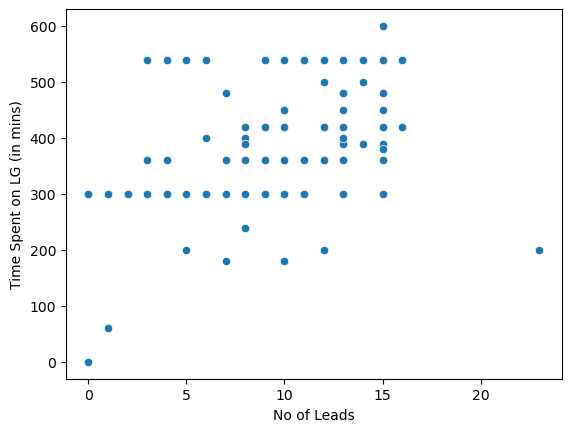

In [19]:
sns.scatterplot(data=data,x='No of Leads',y="Time Spent on LG (in mins)")
plt.show()